In [1]:
# adapted from https://github.com/JoseAlanis/supplementary_social_flanker/blob/master/05_analysis.py


import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import Normalize
import seaborn as sns
from matplotlib.colors import ListedColormap

from mne import read_epochs, combine_evoked, grand_average
from mne.channels import make_1020_channel_selections
from mne.viz import plot_compare_evokeds


# All parameters are defined in config.py
#from config import subjects, fname, LoggingFormat
#from stats import within_subject_cis
my_cmap = ListedColormap(sns.color_palette(sns.color_palette("colorblind")).as_hex())


## Plot ERPS on group basis

In [2]:
pos_incongruent_incorrect_base = dict()
pos_incongruent_correct_base = dict()
pos_incongruent_incorrect_erps_base = dict()
pos_incongruent_correct_erps_base = dict()
pos_incongruent_incorrect_pos = dict()
pos_incongruent_correct_pos = dict()
pos_incongruent_incorrect_erps_pos = dict()
pos_incongruent_correct_erps_pos = dict()
pos_incongruent_incorrect_neg = dict()
pos_incongruent_correct_neg = dict()
pos_incongruent_incorrect_erps_neg = dict()
pos_incongruent_correct_erps_neg = dict()

neg_incongruent_incorrect_base = dict()
neg_incongruent_correct_base = dict()
neg_incongruent_incorrect_erps_base = dict()
neg_incongruent_correct_erps_base = dict()
neg_incongruent_incorrect_pos = dict()
neg_incongruent_correct_pos = dict()
neg_incongruent_incorrect_erps_pos = dict()
neg_incongruent_correct_erps_pos = dict()
neg_incongruent_incorrect_neg = dict()
neg_incongruent_correct_neg = dict()
neg_incongruent_incorrect_erps_neg = dict()
neg_incongruent_correct_erps_neg = dict()
neg_negative_first_epochs = dict()
neg_positive_first_epochs = dict()

rootdir = '/home/michael/data/derivatives/reaction_epochs'

counter = 0
directory = '/home/michael/data/derivatives/results/erp_plots'

if not os.path.exists(directory):
    os.makedirs(directory)

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        filepath = subdir + os.sep + file
        if filepath.endswith(".fif"):
            print (filepath)
            print((filepath.split('/')[-2].split('-')[-1]))
            subject = (filepath.split('/')[-2].split('-')[-1])[-2:]
            target_epo = read_epochs(filepath, preload=True)

            display(target_epo.metadata['negative_first'].iloc[0])
            if target_epo.metadata['negative_first'].iloc[0] == True:
                display('########################')
                display(target_epo.metadata['negative_first'].iloc[0])
                display('sorted to negative first')
                display('########################')
                # and apply baseline
                neg_incongruent_incorrect_base['subj_' + subject] = target_epo['condition == 1']['incorrect_incongruent'].apply_baseline((-0.300, -0.050))
                neg_incongruent_correct_base['subj_' + subject] = target_epo['condition == 1']['correct_incongruent'].apply_baseline((-0.300, -0.050))
                neg_incongruent_incorrect_pos['subj_' + subject] = target_epo['condition == 2']['incorrect_incongruent'].apply_baseline((-0.300, -0.050))
                neg_incongruent_correct_pos['subj_' + subject] = target_epo['condition == 2']['correct_incongruent'].apply_baseline((-0.300, -0.050))
                neg_incongruent_incorrect_neg['subj_' + subject] = target_epo['condition == 3']['incorrect_incongruent'].apply_baseline((-0.300, -0.050))
                neg_incongruent_correct_neg['subj_' + subject] = target_epo['condition == 3']['correct_incongruent'].apply_baseline((-0.300, -0.050))

                # compute ERP
                neg_incongruent_incorrect_erps_base['subj_' + subject] = neg_incongruent_incorrect_base['subj_' + subject].average()
                neg_incongruent_correct_erps_base['subj_' + subject] = neg_incongruent_correct_base['subj_' + subject].average()
                neg_incongruent_incorrect_erps_pos['subj_' + subject] = neg_incongruent_incorrect_pos['subj_' + subject].average()
                neg_incongruent_correct_erps_pos['subj_' + subject] = neg_incongruent_correct_pos['subj_' + subject].average()
                neg_incongruent_incorrect_erps_neg['subj_' + subject] = neg_incongruent_incorrect_neg['subj_' + subject].average()
                neg_incongruent_correct_erps_neg['subj_' + subject] = neg_incongruent_correct_neg['subj_' + subject].average()
                #display(incongruent_incorrect_erps_neu)
            elif target_epo.metadata['negative_first'].iloc[0] == False:
                display('########################')
                display(target_epo.metadata['negative_first'].iloc[0])
                display('sorted to positive first')
                display('########################')
                # and apply baseline
                pos_incongruent_incorrect_base['subj_' + subject] = target_epo['condition == 1']['incorrect_incongruent'].apply_baseline((-0.300, -0.050))
                pos_incongruent_correct_base['subj_' + subject] = target_epo['condition == 1']['correct_incongruent'].apply_baseline((-0.300, -0.050))
                pos_incongruent_incorrect_pos['subj_' + subject] = target_epo['condition == 2']['incorrect_incongruent'].apply_baseline((-0.300, -0.050))
                pos_incongruent_correct_pos['subj_' + subject] = target_epo['condition == 2']['correct_incongruent'].apply_baseline((-0.300, -0.050))
                pos_incongruent_incorrect_neg['subj_' + subject] = target_epo['condition == 3']['incorrect_incongruent'].apply_baseline((-0.300, -0.050))
                pos_incongruent_correct_neg['subj_' + subject] = target_epo['condition == 3']['correct_incongruent'].apply_baseline((-0.300, -0.050))

                # compute ERP
                pos_incongruent_incorrect_erps_base['subj_' + subject] = pos_incongruent_incorrect_base['subj_' + subject].average()
                pos_incongruent_correct_erps_base['subj_' + subject] = pos_incongruent_correct_base['subj_' + subject].average()
                pos_incongruent_incorrect_erps_pos['subj_' + subject] = pos_incongruent_incorrect_pos['subj_' + subject].average()
                pos_incongruent_correct_erps_pos['subj_' + subject] = pos_incongruent_correct_pos['subj_' + subject].average()
                pos_incongruent_incorrect_erps_neg['subj_' + subject] = pos_incongruent_incorrect_neg['subj_' + subject].average()
                pos_incongruent_correct_erps_neg['subj_' + subject] = pos_incongruent_correct_neg['subj_' + subject].average()
                

/home/michael/data/derivatives/reaction_epochs/sub-007/sub-007-reaction_epochs-epo.fif
007
Reading /home/michael/data/derivatives/reaction_epochs/sub-007/sub-007-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1229 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


True

'########################'

True

'sorted to negative first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-009/sub-009-reaction_epochs-epo.fif
009
Reading /home/michael/data/derivatives/reaction_epochs/sub-009/sub-009-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1234 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


True

'########################'

True

'sorted to negative first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-018/sub-018-reaction_epochs-epo.fif
018
Reading /home/michael/data/derivatives/reaction_epochs/sub-018/sub-018-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1223 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


True

'########################'

True

'sorted to negative first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-011/sub-011-reaction_epochs-epo.fif
011
Reading /home/michael/data/derivatives/reaction_epochs/sub-011/sub-011-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1219 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


False

'########################'

False

'sorted to positive first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-023/sub-023-reaction_epochs-epo.fif
023
Reading /home/michael/data/derivatives/reaction_epochs/sub-023/sub-023-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1181 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


False

'########################'

False

'sorted to positive first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-031/sub-031-reaction_epochs-epo.fif
031
Reading /home/michael/data/derivatives/reaction_epochs/sub-031/sub-031-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1227 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


False

'########################'

False

'sorted to positive first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-008/sub-008-reaction_epochs-epo.fif
008
Reading /home/michael/data/derivatives/reaction_epochs/sub-008/sub-008-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1224 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


False

'########################'

False

'sorted to positive first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-022/sub-022-reaction_epochs-epo.fif
022
Reading /home/michael/data/derivatives/reaction_epochs/sub-022/sub-022-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1236 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


True

'########################'

True

'sorted to negative first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-036/sub-036-reaction_epochs-epo.fif
036
Reading /home/michael/data/derivatives/reaction_epochs/sub-036/sub-036-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1215 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


True

'########################'

True

'sorted to negative first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-003/sub-003-reaction_epochs-epo.fif
003
Reading /home/michael/data/derivatives/reaction_epochs/sub-003/sub-003-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1176 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


True

'########################'

True

'sorted to negative first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-029/sub-029-reaction_epochs-epo.fif
029
Reading /home/michael/data/derivatives/reaction_epochs/sub-029/sub-029-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
881 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


False

'########################'

False

'sorted to positive first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-004/sub-004-reaction_epochs-epo.fif
004
Reading /home/michael/data/derivatives/reaction_epochs/sub-004/sub-004-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1215 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


False

'########################'

False

'sorted to positive first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-005/sub-005-reaction_epochs-epo.fif
005
Reading /home/michael/data/derivatives/reaction_epochs/sub-005/sub-005-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1214 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


True

'########################'

True

'sorted to negative first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-015/sub-015-reaction_epochs-epo.fif
015
Reading /home/michael/data/derivatives/reaction_epochs/sub-015/sub-015-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1220 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


False

'########################'

False

'sorted to positive first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-002/sub-002-reaction_epochs-epo.fif
002
Reading /home/michael/data/derivatives/reaction_epochs/sub-002/sub-002-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1231 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


False

'########################'

False

'sorted to positive first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-037/sub-037-reaction_epochs-epo.fif
037
Reading /home/michael/data/derivatives/reaction_epochs/sub-037/sub-037-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1233 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


False

'########################'

False

'sorted to positive first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-012/sub-012-reaction_epochs-epo.fif
012
Reading /home/michael/data/derivatives/reaction_epochs/sub-012/sub-012-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1135 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


True

'########################'

True

'sorted to negative first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-010/sub-010-reaction_epochs-epo.fif
010
Reading /home/michael/data/derivatives/reaction_epochs/sub-010/sub-010-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1051 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


False

'########################'

False

'sorted to positive first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-006/sub-006-reaction_epochs-epo.fif
006
Reading /home/michael/data/derivatives/reaction_epochs/sub-006/sub-006-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1190 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


False

'########################'

False

'sorted to positive first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-020/sub-020-reaction_epochs-epo.fif
020
Reading /home/michael/data/derivatives/reaction_epochs/sub-020/sub-020-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1230 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


True

'########################'

True

'sorted to negative first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-032/sub-032-reaction_epochs-epo.fif
032
Reading /home/michael/data/derivatives/reaction_epochs/sub-032/sub-032-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
909 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


True

'########################'

True

'sorted to negative first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-024/sub-024-reaction_epochs-epo.fif
024
Reading /home/michael/data/derivatives/reaction_epochs/sub-024/sub-024-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1229 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


True

'########################'

True

'sorted to negative first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-017/sub-017-reaction_epochs-epo.fif
017
Reading /home/michael/data/derivatives/reaction_epochs/sub-017/sub-017-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1210 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


False

'########################'

False

'sorted to positive first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-027/sub-027-reaction_epochs-epo.fif
027
Reading /home/michael/data/derivatives/reaction_epochs/sub-027/sub-027-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1114 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


False

'########################'

False

'sorted to positive first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-035/sub-035-reaction_epochs-epo.fif
035
Reading /home/michael/data/derivatives/reaction_epochs/sub-035/sub-035-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1232 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


True

'########################'

True

'sorted to negative first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-033/sub-033-reaction_epochs-epo.fif
033
Reading /home/michael/data/derivatives/reaction_epochs/sub-033/sub-033-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1110 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


False

'########################'

False

'sorted to positive first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-019/sub-019-reaction_epochs-epo.fif
019
Reading /home/michael/data/derivatives/reaction_epochs/sub-019/sub-019-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1207 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


False

'########################'

False

'sorted to positive first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-014/sub-014-reaction_epochs-epo.fif
014
Reading /home/michael/data/derivatives/reaction_epochs/sub-014/sub-014-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1122 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


True

'########################'

True

'sorted to negative first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-038/sub-038-reaction_epochs-epo.fif
038
Reading /home/michael/data/derivatives/reaction_epochs/sub-038/sub-038-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
992 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


False

'########################'

False

'sorted to positive first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-016/sub-016-reaction_epochs-epo.fif
016
Reading /home/michael/data/derivatives/reaction_epochs/sub-016/sub-016-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1217 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


True

'########################'

True

'sorted to negative first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-028/sub-028-reaction_epochs-epo.fif
028
Reading /home/michael/data/derivatives/reaction_epochs/sub-028/sub-028-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1214 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


True

'########################'

True

'sorted to negative first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
/home/michael/data/derivatives/reaction_epochs/sub-013/sub-013-reaction_epochs-epo.fif
013
Reading /home/michael/data/derivatives/reaction_epochs/sub-013/sub-013-reaction_epochs-epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64) active
    Found the data of interest:
        t =   -1500.00 ...    1500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
Replacing existing metadata with 9 columns
1223 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


False

'########################'

False

'sorted to positive first'

'########################'

Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)
Applying baseline correction (mode: mean)


Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Projections have already been applied. Setting proj attribute to True.


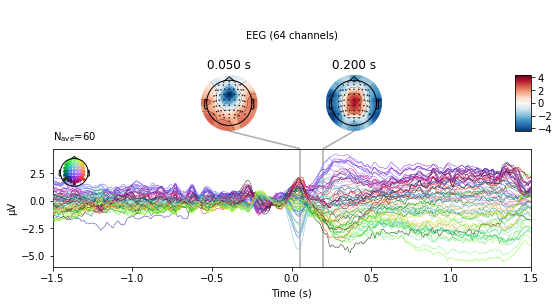

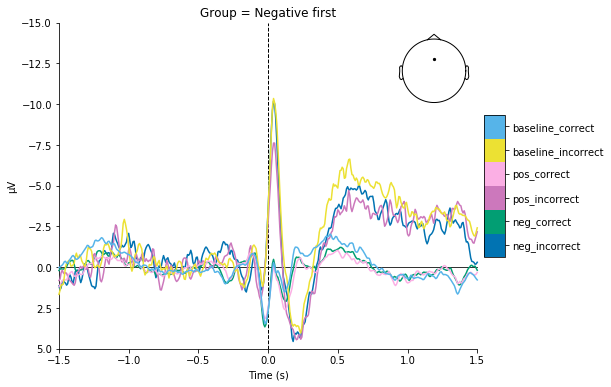

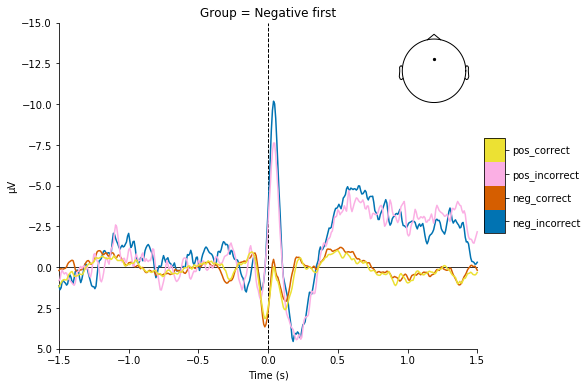

[<Figure size 576x432 with 3 Axes>]

In [3]:
# create evokeds dict
neg_ga_incongruent_incorrect_base = \
    grand_average(list(neg_incongruent_incorrect_erps_base.values()))
neg_ga_incongruent_correct_base = \
    grand_average(list(neg_incongruent_correct_erps_base.values()))
neg_ga_incongruent_incorrect_pos = \
    grand_average(list(neg_incongruent_incorrect_erps_pos.values()))
neg_ga_incongruent_correct_pos = \
    grand_average(list(neg_incongruent_correct_erps_pos.values()))
neg_ga_incongruent_incorrect_neg = \
    grand_average(list(neg_incongruent_incorrect_erps_neg.values()))
neg_ga_incongruent_correct_neg = \
    grand_average(list(neg_incongruent_correct_erps_neg.values()))



# create and plot difference ERP
joint_kwargs = \
    dict(times=[0.050, 0.200],
         ts_args=dict(time_unit='s'),
         topomap_args=dict(time_unit='s'))

fig_combine_evoked = combine_evoked([neg_ga_incongruent_incorrect_base, - neg_ga_incongruent_correct_base,
                neg_ga_incongruent_incorrect_pos, - neg_ga_incongruent_correct_pos],
               weights='equal').plot_joint(**joint_kwargs)

compare = plot_compare_evokeds(dict(neg_incorrect=neg_ga_incongruent_incorrect_neg,
                                    neg_correct=neg_ga_incongruent_correct_neg,
                                    pos_incorrect=neg_ga_incongruent_incorrect_pos,
                                    pos_correct=neg_ga_incongruent_correct_pos,
                                    baseline_incorrect=neg_ga_incongruent_incorrect_base,
                                    baseline_correct=neg_ga_incongruent_correct_base),
                               picks='FCz', invert_y=True, title ='Group = Negative first',
                               ylim=dict(eeg=[-15, 5]), cmap=my_cmap)

#compare.savefig(directory+ 'ern_compared_overall.png')
my_cmap = ListedColormap(sns.color_palette(sns.color_palette("colorblind",9)).as_hex())

plot_compare_evokeds(dict(neg_incorrect=neg_ga_incongruent_incorrect_neg,
                                    neg_correct=neg_ga_incongruent_correct_neg,
                                    pos_incorrect=neg_ga_incongruent_incorrect_pos,
                                    pos_correct=neg_ga_incongruent_correct_pos),
                               picks='FCz', invert_y=True, title='Group = Negative first',
                               ylim=dict(eeg=[-15, 5]), cmap=my_cmap)

Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Identifying common channels ...
Projections have already been applied. Setting proj attribute to True.


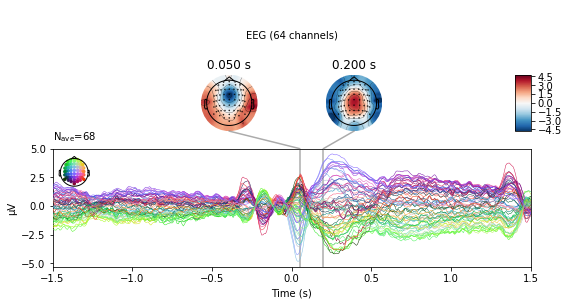

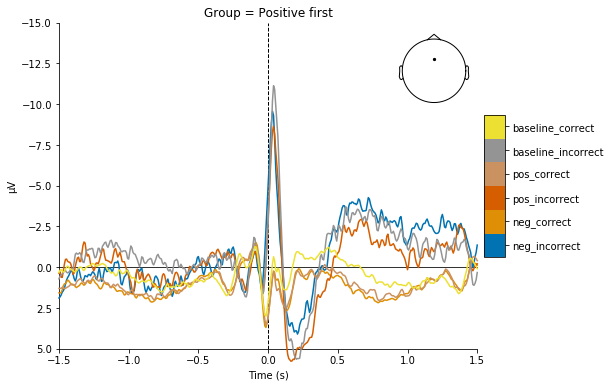

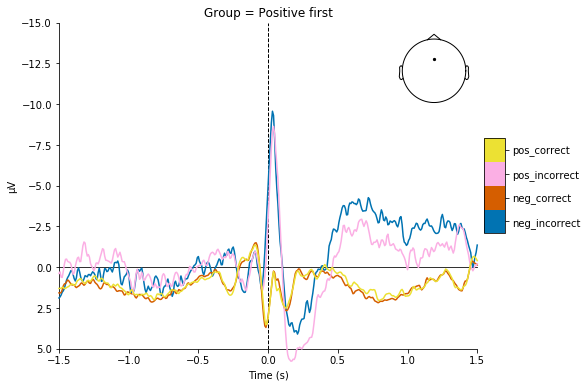

[<Figure size 576x432 with 3 Axes>]

In [4]:
# create evokeds dict
pos_ga_incongruent_incorrect_base = \
    grand_average(list(pos_incongruent_incorrect_erps_base.values()))
pos_ga_incongruent_correct_base = \
    grand_average(list(pos_incongruent_correct_erps_base.values()))
pos_ga_incongruent_incorrect_pos = \
    grand_average(list(pos_incongruent_incorrect_erps_pos.values()))
pos_ga_incongruent_correct_pos = \
    grand_average(list(pos_incongruent_correct_erps_pos.values()))
pos_ga_incongruent_incorrect_neg = \
    grand_average(list(pos_incongruent_incorrect_erps_neg.values()))
pos_ga_incongruent_correct_neg = \
    grand_average(list(pos_incongruent_correct_erps_neg.values()))



# create and plot difference ERP
joint_kwargs = \
    dict(times=[0.050, 0.200],
         ts_args=dict(time_unit='s'),
         topomap_args=dict(time_unit='s'))

fig_combine_evoked = combine_evoked([pos_ga_incongruent_incorrect_base, - pos_ga_incongruent_correct_base,
                pos_ga_incongruent_incorrect_pos, - pos_ga_incongruent_correct_pos],
               weights='equal').plot_joint(**joint_kwargs)

compare = plot_compare_evokeds(dict(neg_incorrect=pos_ga_incongruent_incorrect_neg,
                                    neg_correct=pos_ga_incongruent_correct_neg,
                                    pos_incorrect=pos_ga_incongruent_incorrect_pos,
                                    pos_correct=pos_ga_incongruent_correct_pos,
                                    baseline_incorrect=pos_ga_incongruent_incorrect_base,
                                    baseline_correct=pos_ga_incongruent_correct_base),
                               picks='FCz', invert_y=True, title ='Group = Positive first',
                               ylim=dict(eeg=[-15, 5]), cmap=my_cmap)

#compare.savefig(directory+ 'ern_compared_overall.png')
my_cmap = ListedColormap(sns.color_palette(sns.color_palette("colorblind",9)).as_hex())

plot_compare_evokeds(dict(neg_incorrect=pos_ga_incongruent_incorrect_neg,
                                    neg_correct=pos_ga_incongruent_correct_neg,
                                    pos_incorrect=pos_ga_incongruent_incorrect_pos,
                                    pos_correct=pos_ga_incongruent_correct_pos),
                               picks='FCz', invert_y=True, title='Group = Positive first',
                               ylim=dict(eeg=[-15, 5]), cmap=my_cmap)

### print minima & maxima for neg group

In [5]:
print('Maxima incorrect')
print('Baseline')

ga_incong_base_df = neg_ga_incongruent_incorrect_base.to_data_frame()
display(ga_incong_base_df[ 'FCz'].max())

display(ga_incong_base_df.loc[ga_incong_base_df['FCz'] == ga_incong_base_df['FCz'].max()])

print('negative')

ga_incong_correct_neg_df = neg_ga_incongruent_incorrect_neg.to_data_frame()
display(ga_incong_correct_neg_df[ 'FCz'].max())

display(ga_incong_correct_neg_df.loc[ga_incong_correct_neg_df['FCz'] == ga_incong_correct_neg_df[ 'FCz'].max()])

print('positive')

ga_incong_correct_pos_df = neg_ga_incongruent_incorrect_pos.to_data_frame()
display(ga_incong_correct_pos_df[ 'FCz'].max())

display(ga_incong_correct_pos_df.loc[ga_incong_correct_pos_df['FCz'] == ga_incong_correct_pos_df[ 'FCz'].max()])

print('Minima incorrect')
print('Baseline')

ga_incong_base_df = neg_ga_incongruent_incorrect_base.to_data_frame()
display(ga_incong_base_df[ 'FCz'].min())

display(ga_incong_base_df.loc[ga_incong_base_df['FCz'] == ga_incong_base_df['FCz'].min()])

print('negative')

ga_incong_neg_df = neg_ga_incongruent_incorrect_neg.to_data_frame()
display(ga_incong_neg_df[ 'FCz'].min())

display(ga_incong_neg_df.loc[ga_incong_neg_df['FCz'] == ga_incong_neg_df[ 'FCz'].min()])
print('positive')

ga_incong_pos_df = neg_ga_incongruent_incorrect_pos.to_data_frame()
display(ga_incong_pos_df[ 'FCz'].min())

display(ga_incong_pos_df.loc[ga_incong_pos_df['FCz'] == ga_incong_pos_df[ 'FCz'].min()])

print('Maxima correct')
print('Baseline')

ga_incong_base_df = neg_ga_incongruent_correct_base.to_data_frame()
display(ga_incong_base_df[ 'FCz'].max())

display(ga_incong_base_df.loc[ga_incong_base_df['FCz'] == ga_incong_base_df['FCz'].max()])

print('negative')

ga_incong_neg_df = neg_ga_incongruent_correct_neg.to_data_frame()
display(ga_incong_neg_df[ 'FCz'].max())

display(ga_incong_neg_df.loc[ga_incong_neg_df['FCz'] == ga_incong_neg_df[ 'FCz'].max()])

print('positive')

ga_incong_pos_df = neg_ga_incongruent_correct_pos.to_data_frame()
display(ga_incong_pos_df[ 'FCz'].max())

display(ga_incong_pos_df.loc[ga_incong_pos_df['FCz'] == ga_incong_pos_df[ 'FCz'].max()])

print('Minima correct')
print('Baseline')

ga_incong_base_df = neg_ga_incongruent_correct_base.to_data_frame()
display(ga_incong_base_df[ 'FCz'].min())

display(ga_incong_base_df.loc[ga_incong_base_df['FCz'] == ga_incong_base_df['FCz'].min()])

print('negative')

ga_incong_neg_df = neg_ga_incongruent_correct_neg.to_data_frame()
display(ga_incong_neg_df[ 'FCz'].min())

display(ga_incong_neg_df.loc[ga_incong_neg_df['FCz'] == ga_incong_neg_df[ 'FCz'].min()])

print('positive')

ga_incong_pos_df = neg_ga_incongruent_correct_pos.to_data_frame()
display(ga_incong_pos_df[ 'FCz'].min())

display(ga_incong_pos_df.loc[ga_incong_pos_df['FCz'] == ga_incong_pos_df[ 'FCz'].min()])

Maxima incorrect
Baseline


4.029985275768855

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
222,234,-0.588429,-3.303343,-3.208536,-0.725115,-0.987437,-3.967925,-5.746979,-4.957554,-1.03571,...,1.872647,4.860654,4.642736,1.477047,-0.673045,-2.171554,-4.922961,-2.607221,0.836418,-1.601332


negative


4.551048811795545

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
215,180,-1.941522,-3.006722,-2.24236,0.318476,-1.737991,-2.5904,-2.930145,-3.363468,-1.476731,...,0.949664,4.469704,2.855337,0.037348,-0.949811,-1.663299,-4.024877,-1.59588,0.365303,-1.878881


positive


4.445310778876759

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
218,203,-2.769051,-2.760662,-2.093451,0.339882,-2.018287,-3.14521,-3.441254,-3.322009,-1.860076,...,0.89603,4.954014,3.918727,0.535873,-0.380542,-1.397036,-4.061462,-1.542858,0.744342,-0.236941


Minima incorrect
Baseline


-10.348912254157176

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
197,39,-1.740859,-3.168039,-3.504511,-6.379117,-3.073307,-1.746013,-1.494141,0.261043,0.148703,...,3.017617,0.631652,2.581119,4.129364,4.413955,4.143744,3.166673,4.215619,3.860155,3.095629


negative


-10.183382608470394

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
197,39,-4.214542,-3.285218,-3.610258,-6.633685,-3.15503,-1.51358,-1.077518,-0.495263,-1.260689,...,3.426068,1.235155,3.488437,4.31038,4.694491,4.578519,2.785747,4.435159,4.682729,3.341537


positive


-7.617822531895503

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
197,39,-4.365643,-3.378388,-3.548076,-5.39537,-3.518642,-2.421669,-2.126663,-1.046959,-1.483456,...,2.799848,1.948757,3.412325,3.840883,4.207235,3.645354,1.5491,3.769538,3.912695,2.787882


Maxima correct
Baseline


3.4376756386121237

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
190,-16,-2.33638,-2.234267,-1.938152,0.050127,-1.214868,-2.090845,-2.861908,-2.609863,-1.530406,...,1.906637,3.306186,2.232812,1.028812,0.495498,-0.231797,-2.892587,-0.970291,0.200296,-1.334615


negative


3.6540520844296385

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
189,-23,-1.692697,-1.447788,-1.389798,0.543204,-0.774109,-1.568376,-2.028719,-2.345236,-1.179545,...,1.303446,3.075072,2.061488,0.750888,0.171418,-0.539567,-2.963554,-0.794623,0.136978,-1.473843


positive


3.1536120364402858

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
189,-23,-1.622839,-1.518244,-1.533617,0.367661,-0.782742,-1.76426,-2.280193,-2.382944,-1.228527,...,1.462618,2.956358,1.991545,0.920364,0.305565,-0.549355,-2.57582,-0.746947,0.302036,-1.345239


Minima correct
Baseline


-2.0376997173107023

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
249,445,1.184872,1.145254,0.48914,-1.198045,-0.6093,0.458641,0.589905,0.896211,-0.596828,...,-1.854894,-1.94234,-1.21985,-1.37237,-0.544813,1.086054,3.782648,0.970873,-0.193393,2.698428


negative


-1.2187289840005862

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
259,523,0.977163,0.617678,0.147605,-0.806743,-0.988043,-0.640321,-0.158207,-0.205216,-0.988126,...,-1.488192,-1.542339,-0.267459,-0.683045,0.016269,1.161209,3.027436,1.721475,0.878852,2.871268


positive


-1.0285733127355232

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
256,500,1.380656,0.77643,0.073844,-0.935216,-0.748332,-0.418151,-0.506291,-0.014469,-0.714806,...,-1.204208,-1.58188,-0.559797,-0.515115,-0.302352,0.64583,2.738149,1.164958,0.448689,2.552149


### print minima and maxima for pos group

In [6]:
print('Maxima incorrect')
print('Baseline')

ga_incong_base_df = pos_ga_incongruent_incorrect_base.to_data_frame()
display(ga_incong_base_df[ 'FCz'].max())

display(ga_incong_base_df.loc[ga_incong_base_df['FCz'] == ga_incong_base_df['FCz'].max()])

print('negative')

ga_incong_correct_neg_df = pos_ga_incongruent_incorrect_neg.to_data_frame()
display(ga_incong_correct_neg_df[ 'FCz'].max())

display(ga_incong_correct_neg_df.loc[ga_incong_correct_neg_df['FCz'] == ga_incong_correct_neg_df[ 'FCz'].max()])

print('positive')

ga_incong_correct_pos_df = pos_ga_incongruent_incorrect_pos.to_data_frame()
display(ga_incong_correct_pos_df[ 'FCz'].max())

display(ga_incong_correct_pos_df.loc[ga_incong_correct_pos_df['FCz'] == ga_incong_correct_pos_df[ 'FCz'].max()])

print('Minima incorrect')
print('Baseline')

ga_incong_base_df = pos_ga_incongruent_incorrect_base.to_data_frame()
display(ga_incong_base_df[ 'FCz'].min())

display(ga_incong_base_df.loc[ga_incong_base_df['FCz'] == ga_incong_base_df['FCz'].min()])

print('negative')

ga_incong_neg_df = pos_ga_incongruent_incorrect_neg.to_data_frame()
display(ga_incong_neg_df[ 'FCz'].min())

display(ga_incong_neg_df.loc[ga_incong_neg_df['FCz'] == ga_incong_neg_df[ 'FCz'].min()])
print('positive')

ga_incong_pos_df = pos_ga_incongruent_incorrect_pos.to_data_frame()
display(ga_incong_pos_df[ 'FCz'].min())

display(ga_incong_pos_df.loc[ga_incong_pos_df['FCz'] == ga_incong_pos_df[ 'FCz'].min()])

print('Maxima correct')
print('Baseline')

ga_incong_base_df = pos_ga_incongruent_correct_base.to_data_frame()
display(ga_incong_base_df[ 'FCz'].max())

display(ga_incong_base_df.loc[ga_incong_base_df['FCz'] == ga_incong_base_df['FCz'].max()])

print('negative')

ga_incong_neg_df = pos_ga_incongruent_correct_neg.to_data_frame()
display(ga_incong_neg_df[ 'FCz'].max())

display(ga_incong_neg_df.loc[ga_incong_neg_df['FCz'] == ga_incong_neg_df[ 'FCz'].max()])

print('positive')

ga_incong_pos_df = pos_ga_incongruent_correct_pos.to_data_frame()
display(ga_incong_pos_df[ 'FCz'].max())

display(ga_incong_pos_df.loc[ga_incong_pos_df['FCz'] == ga_incong_pos_df[ 'FCz'].max()])

print('Minima correct')
print('Baseline')

ga_incong_base_df = pos_ga_incongruent_correct_base.to_data_frame()
display(ga_incong_base_df[ 'FCz'].min())

display(ga_incong_base_df.loc[ga_incong_base_df['FCz'] == ga_incong_base_df['FCz'].min()])

print('negative')

ga_incong_neg_df = pos_ga_incongruent_correct_neg.to_data_frame()
display(ga_incong_neg_df[ 'FCz'].min())

display(ga_incong_neg_df.loc[ga_incong_neg_df['FCz'] == ga_incong_neg_df[ 'FCz'].min()])

print('positive')

ga_incong_pos_df = pos_ga_incongruent_correct_pos.to_data_frame()
display(ga_incong_pos_df[ 'FCz'].min())

display(ga_incong_pos_df.loc[ga_incong_pos_df['FCz'] == ga_incong_pos_df[ 'FCz'].min()])

Maxima incorrect
Baseline


5.640412816008888

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
218,203,-4.313931,-7.000461,-5.197996,-1.312912,-4.558817,-6.489894,-6.464818,-5.219769,-4.182979,...,3.820326,6.471478,5.353278,3.201968,1.214087,-0.316757,-4.181284,0.263704,1.51571,0.188241


negative


4.0970264571889485

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
219,211,-3.043969,-4.420501,-3.331267,-0.570099,-2.485396,-3.87839,-4.678045,-3.391321,-1.777667,...,2.337834,5.680052,4.566897,1.550275,0.016486,-1.686256,-3.688259,-0.582893,1.277308,-0.012189


positive


5.762254146700483

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
213,164,-3.491719,-4.56319,-3.457617,-0.297495,-3.090369,-3.889797,-4.540792,-3.571628,-2.524606,...,2.71038,5.092639,3.401001,1.499206,0.649519,-0.911923,-3.135662,-1.452464,-0.227898,-1.951285


Minima incorrect
Baseline


-11.132407671026257

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
197,39,-3.180724,-2.844478,-3.538583,-7.48715,-4.301112,-2.394874,-0.861539,0.584629,-0.962432,...,2.838099,0.09864,3.25434,5.025786,5.192968,5.905153,4.59868,5.958515,4.491051,4.395818


negative


-9.568343840858414

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
196,31,-3.800067,-3.387411,-4.163848,-7.05288,-4.623004,-2.596279,-1.49589,0.020078,-1.449944,...,3.124767,1.083637,4.013867,4.427569,4.385033,5.297736,3.310898,5.513392,4.66952,3.96289


positive


-8.635796823503195

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
197,39,-3.78438,-3.193306,-3.33605,-5.755458,-3.317401,-1.528276,-1.159311,0.029186,-0.519112,...,2.559915,0.728453,3.158174,4.231874,4.653754,4.40775,2.587797,4.487744,3.382896,3.008876


Maxima correct
Baseline


2.990876201424592

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
190,-16,-2.815968,-3.292211,-2.561198,-0.499298,-1.603406,-2.862755,-3.446867,-3.122255,-1.970187,...,2.414924,3.97988,3.518948,1.828487,1.060733,0.137979,-2.125682,0.201413,1.090028,-0.458825


negative


3.6930574105474894

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
190,-16,-3.224827,-3.298305,-2.592931,-0.314752,-1.866572,-3.046006,-3.833465,-3.432199,-2.159696,...,2.664295,4.573487,3.785919,2.156945,1.159157,0.084518,-2.449544,0.426591,0.701942,-0.58647


positive


3.5285332743322373

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
190,-16,-3.198762,-3.327078,-2.724256,-0.625897,-2.159204,-3.2228,-3.821786,-3.559749,-2.241106,...,2.614402,4.505273,3.884735,2.231675,1.32765,0.483139,-2.038437,0.875342,1.563142,-0.035034


Minima correct
Baseline


-1.2655127134600803

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
180,-94,-1.233309,-1.094158,-1.141027,-1.144822,-0.844082,-0.844656,-0.867736,-0.450258,-0.337954,...,0.691234,0.599032,1.219358,0.998187,0.883978,0.584943,-0.616487,0.767363,0.910683,0.331682


negative


-1.5026235821471539

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
181,-86,-1.519744,-1.546348,-1.502783,-1.492737,-1.153481,-1.069833,-1.249575,-0.772563,-0.685769,...,0.909303,0.991265,1.569973,1.389983,1.359899,1.028264,-0.120203,1.352025,1.242087,0.769231


positive


-1.3758019813048799

,time,Fp1,AF7,AF3,F1,F3,F5,F7,FT7,FC5,...,CP4,CP2,P2,P4,P6,P8,P10,PO8,PO4,O2
180,-94,-1.376421,-1.310117,-1.159388,-1.208298,-0.842878,-0.854567,-0.880033,-0.54377,-0.380011,...,0.792795,0.854388,1.423396,1.153812,0.98486,0.45881,-0.612275,0.850563,1.040617,0.55781
